In [1768]:
import torch

In [1769]:
import pickle
import os
import numpy as np
import re
import pandas as pd

In [1770]:
ls

0.jpg
1.jpg
2.jpg
3.jpg
4.jpg
__num_bundles_10__num_forces_2.pickle
__num_bundles_10__num_forces_2.pt
__num_bundles_10__num_forces_2_pca.png
__num_bundles_1__num_forces_1.pickle
__num_bundles_1__num_forces_1.pt
__num_bundles_1__num_forces_1_pca.png
__num_bundles_20__num_forces_4.pickle
__num_bundles_20__num_forces_4.pt
__num_bundles_20__num_forces_4_pca.png
__num_bundles_50__num_forces_10.pickle
__num_bundles_50__num_forces_10.pt
__num_bundles_50__num_forces_10_pca.png
__num_bundles_5__num_forces_1.pickle
__num_bundles_5__num_forces_1.pt
__num_bundles_5__num_forces_1_pca.png
test.gif


In [1771]:
ls

0.jpg
1.jpg
2.jpg
3.jpg
4.jpg
__num_bundles_10__num_forces_2.pickle
__num_bundles_10__num_forces_2.pt
__num_bundles_10__num_forces_2_pca.png
__num_bundles_1__num_forces_1.pickle
__num_bundles_1__num_forces_1.pt
__num_bundles_1__num_forces_1_pca.png
__num_bundles_20__num_forces_4.pickle
__num_bundles_20__num_forces_4.pt
__num_bundles_20__num_forces_4_pca.png
__num_bundles_50__num_forces_10.pickle
__num_bundles_50__num_forces_10.pt
__num_bundles_50__num_forces_10_pca.png
__num_bundles_5__num_forces_1.pickle
__num_bundles_5__num_forces_1.pt
__num_bundles_5__num_forces_1_pca.png
test.gif


In [1772]:
files = [f for f in os.listdir('./') if os.path.isfile(f)]
files = np.array(files)
bool_mask = ["pickle" in file for file in files]
files

array(['test.gif', '__num_bundles_20__num_forces_4.pickle',
       '__num_bundles_50__num_forces_10.pt',
       '__num_bundles_10__num_forces_2.pt', '.DS_Store',
       '__num_bundles_50__num_forces_10.pickle',
       '__num_bundles_20__num_forces_4_pca.png',
       '__num_bundles_1__num_forces_1.pt',
       '__num_bundles_50__num_forces_10_pca.png',
       '__num_bundles_5__num_forces_1.pt',
       '__num_bundles_20__num_forces_4.pt',
       '__num_bundles_5__num_forces_1.pickle',
       '__num_bundles_1__num_forces_1_pca.png', '4.jpg',
       '__num_bundles_5__num_forces_1_pca.png',
       '__num_bundles_1__num_forces_1.pickle',
       '__num_bundles_10__num_forces_2_pca.png', '2.jpg',
       '__num_bundles_10__num_forces_2.pickle', '3.jpg', '1.jpg', '0.jpg'],
      dtype='<U39')

In [1773]:
pickle_files = files[bool_mask]
pickle_files = [str(file) for file in pickle_files]
pickle_files

['__num_bundles_20__num_forces_4.pickle',
 '__num_bundles_50__num_forces_10.pickle',
 '__num_bundles_5__num_forces_1.pickle',
 '__num_bundles_1__num_forces_1.pickle',
 '__num_bundles_10__num_forces_2.pickle']

In [1774]:
# pickle_files = ['__num_bundles_1__num_forces_1.pickle',
#                 '__num_bundles_5__num_forces_1.pickle',
#                 '__num_bundles_10__num_forces_2.pickle',
#                 '__num_bundles_50__num_forces_10.pickle',
# '__num_bundles_100__num_forces_20.pickle']
#                  '__num_bundles_250__num_forces_50.pickle',
#                  '__num_bundles_500__num_forces_100.pickle',
#                  '__num_bundles_750__num_forces_150.pickle',
#                  '__num_bundles_1000__num_forces_200.pickle']

In [1775]:
import re

In [1776]:
def hacky_search(regex, string):
    num_bundles = np.array(re.findall(regex, string))
    num_bundles = num_bundles[[result != '' for result in num_bundles]]
    num_bundles = [re.split(f'_', strr) for strr in num_bundles]
    num_bundles = [ {s[1]: int(s[2])} for s in num_bundles]
    return num_bundles

In [1777]:
data = []
for data_file in pickle_files:
    with open(data_file, 'rb') as f:
        x = pickle.load(f)
        
        num_bundles = hacky_search(r'num_bundles_\d*', str(f.name))
        num_forces = hacky_search(r'num_forces_\d*', str(f.name))
        dictt = [{**num_bundles[i], **num_forces[i]} for i in range(len(num_forces))][0]
        try:
            data.append({**x, **dictt})
        except:
            print(f.name, 'failed')

In [1778]:
#data[0].keys()

In [1779]:
import time
import matplotlib.pyplot as plt

500 500
torch.Size([500, 1000])
torch.Size([500, 1000])


No handles with labels found to put in legend.


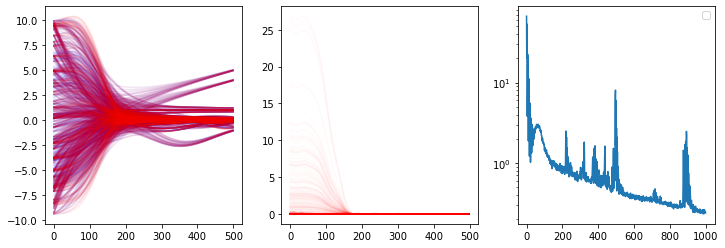

In [1780]:
def quick_plot(index, experiment,traj_to_plot = None):
    fig, ax = plt.subplots(1,3, figsize = (12, 4))
    plt.sca(ax[0])
    run = data[index]
    
    
    
    print(len(run["pred_ys"][0]), len(run["true_ys"][0]))
    print(run["pred_ys"][0].shape)
    print(run["true_ys"][0].shape)
    
    preds, true_ys, loss = run["pred_ys"][experiment], run["true_ys"][experiment], run["loss"]
    if traj_to_plot is None:
        plt.plot(preds, color = "blue", alpha = 0.05)
        plt.plot(true_ys, color = 'red', alpha = 0.05)
        plt.sca(ax[1])
    
        plt.plot( (preds - true_ys) **2 , color = 'red', alpha = 0.01)
        plt.sca(ax[2])
        #print(f'loss shape {loss[0].shape}')
        plt.plot(loss[0])
        plt.yscale('log')
    else:
        indices_2_plot = np.random.choice(list(range(100)), size =traj_to_plot, replace = False)
        plt.plot(preds[:, indices_2_plot], color = "blue", alpha = 1)
        plt.plot(true_ys[:, indices_2_plot], color = 'red', alpha = 1)
        plt.sca(ax[1])
    
        plt.plot( (preds[:, indices_2_plot] - true_ys[:, indices_2_plot]) **2 , color = 'red', alpha = 0.5)
        plt.sca(ax[2])
        plt.plot(loss)
        print(loss.shape)
    
   
    plt.yscale('log')
    
    
    #time.sleep(0.4)
    plt.legend()

quick_plot(0,0)

In [1781]:
def subset_data(dictt, keys_to_extract = ["scores", "bundles", "forces"]):
    return  {key: dictt[key] for key in keys_to_extract}
    

In [1782]:
score_dicts = [subset_data(dat) for dat in data]


In [1783]:
df = pd.DataFrame(score_dicts)
df = df.explode('scores').reset_index(drop=True)
df["scores"] = df["scores"].apply(float)
df

,scores,bundles,forces
0,0.182006,20,4
1,0.001079,50,10
2,1.080029,5,1
3,30.275379,1,1
4,2.446908,10,2


In [1784]:
import seaborn as sns
import matplotlib.pyplot as plt
df["log_scores"] = np.log10(df["scores"])

In [1785]:
# sns.scatterplot(x = "bundles", y = "scores", data = df)
# sns.regplot(x = "bundles", y = "scores", data = df)
# plt.ylim(0, 1)

In [1786]:
# sns.scatterplot(x = "bundles", y = "scores", data = df)
# sns.regplot(x = "bundles", y = "scores", data = df)
# plt.yscale('log')

Text(0.5, 1.0, 'coarse Bundles vs mean log score')

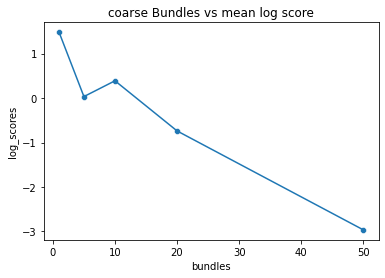

In [1787]:
sns.scatterplot(x = "bundles", y = "log_scores", data = df)
sns.lineplot(x = "bundles", y = "log_scores", data = df)
#sns.regplot(x = "bundles", y = "log_scores", data = df)
plt.title("coarse Bundles vs mean log score")
#plt.yscale('log')

In [1788]:
data[0]["scores"]

[tensor(0.1820)]

<AxesSubplot:xlabel='bundles', ylabel='log_scores'>

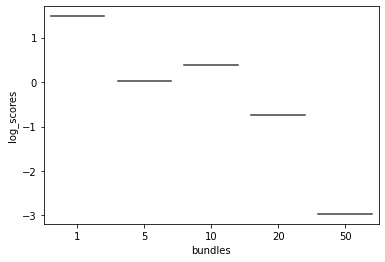

In [1789]:
sns.violinplot(x = "bundles", y = "log_scores", data = df, fliers = False)

In [1790]:
df.head()

,scores,bundles,forces,log_scores
0,0.182006,20,4,-0.739915
1,0.001079,50,10,-2.967088
2,1.080029,5,1,0.033436
3,30.275379,1,1,1.481090
4,2.446908,10,2,0.388618


<AxesSubplot:xlabel='bundles', ylabel='log_scores'>

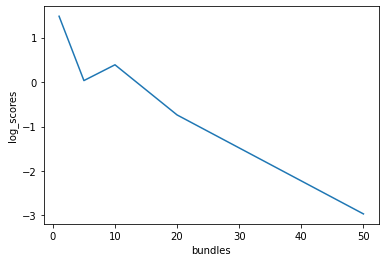

In [1791]:
sns.lineplot(x = "bundles", y = "log_scores", data = df.groupby("bundles").mean())

<AxesSubplot:xlabel='bundles', ylabel='log_scores'>

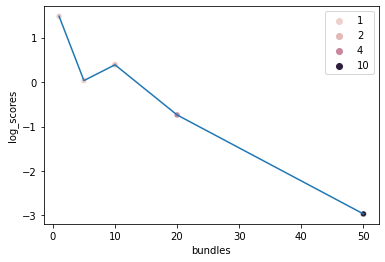

In [1792]:
sns.scatterplot( data=df, x="bundles", y ="log_scores", hue = "forces")
sns.lineplot( data=df, x="bundles", y ="log_scores")#, hue = "forces")

In [1793]:
images = []

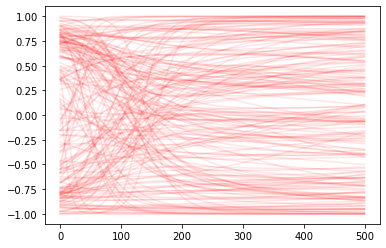

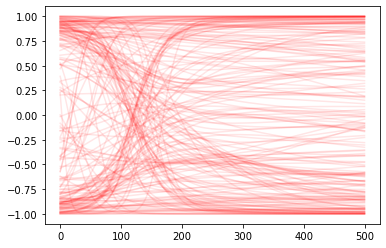

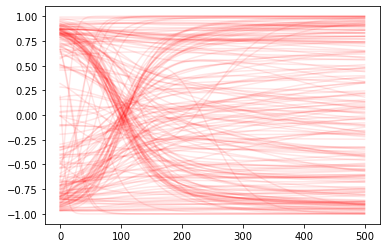

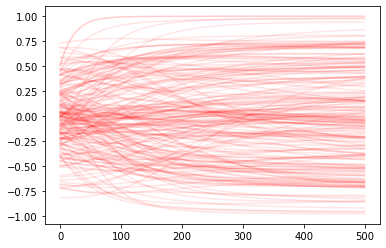

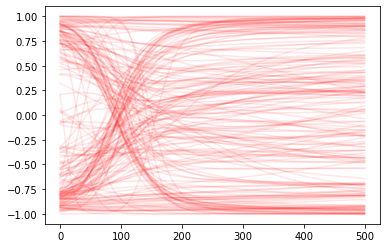

In [1794]:
images = []
for i in range(len(data)):
    fig = plt.figure()
    plt.plot(data[i]["hs"][0], alpha = 0.1, color = "red")
    images.append(fig)
    plt.show()

In [1795]:
data[0].keys()

dict_keys(['models', 'scores', 'pred_ys', 'true_ys', 'loss', 'hs', 'bundles', 'forces'])

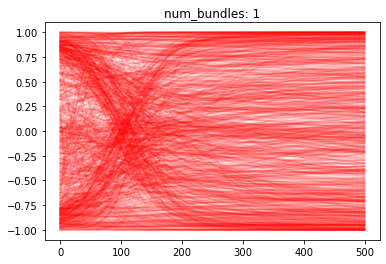

In [1796]:
import imageio
import matplotlib.pyplot as plt
gif_path = "test.gif"
frames_path = "{i}.jpg"

n = len(data)
plt.figure()
for i, x in enumerate(range(len(data))):
#     plt.scatter(x/n, x/n)
#     plt.xlim(0, 1)
#     plt.ylim(0, 1)
    plt.plot(data[i]["hs"][0], alpha = 0.1, color = "red")
    plt.title(f"num_bundles: {bundles}")
    plt.savefig("{i}.jpg".format(i=i))
    bundles = data[i]["bundles"]
    

with imageio.get_writer(gif_path, mode='I') as writer:
    for i in range(n):
        writer.append_data(imageio.imread(frames_path.format(i=i)))